In [13]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [14]:
os.chdir("D:")

In [15]:
data=pd.read_csv(r"D:\ML DATA\HR_comma_sep.csv")

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.46,0.54,2,158,3,0,1,0,support,medium
1,0.09,0.97,7,268,4,0,1,0,support,medium
2,0.89,1.00,4,237,5,0,1,0,support,medium
3,0.82,1.00,4,273,6,0,1,0,support,medium
4,0.11,0.89,6,309,4,0,1,0,support,medium


In [17]:
data.shape

(13963, 10)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13963 entries, 0 to 13962
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     13963 non-null  float64
 1   last_evaluation        13963 non-null  float64
 2   number_project         13963 non-null  int64  
 3   average_montly_hours   13963 non-null  int64  
 4   time_spend_company     13963 non-null  int64  
 5   Work_accident          13963 non-null  int64  
 6   left                   13963 non-null  int64  
 7   promotion_last_5years  13963 non-null  int64  
 8   department             13963 non-null  object 
 9   salary                 13963 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [19]:
data.dtypes[data.dtypes=="object"].index

Index(['department', 'salary'], dtype='object')

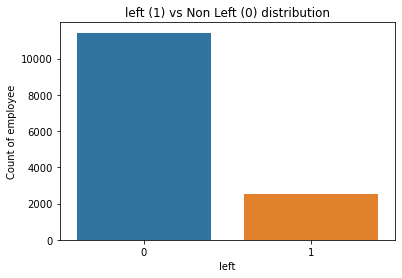

In [20]:
sns.countplot(data=data, x="left")
plt.title("left (1) vs Non Left (0) distribution")
plt.ylabel("Count of employee")
plt.xlabel("left")
plt.show()

### Univariate Analysis

In [21]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:'Count'},inplace=True)
    
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'Percentage'},inplace=True)
    f2['Percentage']=(f2['Percentage']*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)    
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :{unique_cat}\n")
    print("value counts and %n ",ff)
    sns.countplot(data=data, x=x)
    plt.show()

Total missing values : 0

Total count of unique categories: 10

Unique categories :['support', 'technical', 'management', 'IT', 'product_mng', 'RandD', 'marketing', 'sales', 'accounting', 'hr']

value counts and %n               Count Percentage
sales         3837     27.48%
technical     2514      18.0%
support       2073     14.85%
IT            1149      8.23%
product_mng    844      6.04%
marketing      800      5.73%
RandD          762      5.46%
accounting     706      5.06%
hr             674      4.83%
management     604      4.33%


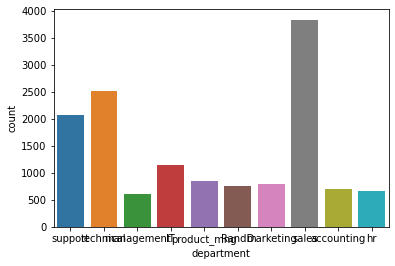

In [22]:
univariate_cat(data=data, x='department')

Total missing values : 0

Total count of unique categories: 3

Unique categories :['medium', 'high', 'low']

value counts and %n          Count Percentage
low      6674      47.8%
medium   6075     43.51%
high     1214      8.69%


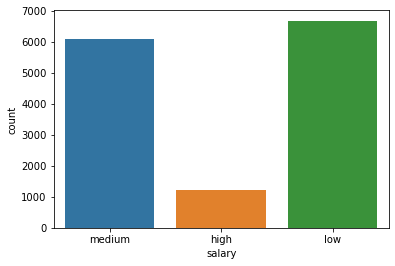

In [23]:
univariate_cat(data=data, x='salary')

In [24]:
data.get_dummies("salary")

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

### Univariate Analysis on Num

In [25]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [26]:
data.dtypes[data.dtypes!="object"].index

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

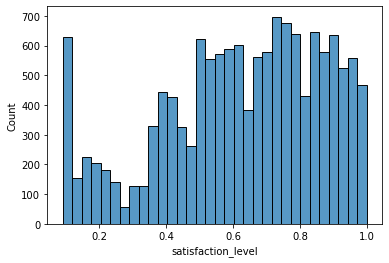

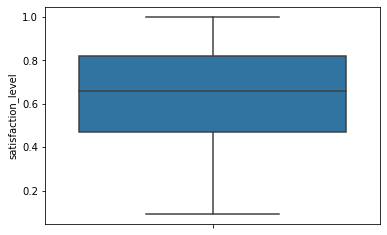

{'missing': 0,
 'min': 0.09,
 'max': 1.0,
 'mean': 0.63,
 'var': 0.06,
 'std': 0.24,
 'range': 0.91,
 'q1': 0.47,
 'q2': 0.66,
 'q3': 0.82,
 'skewness': -0.52,
 'kurtosis': -0.56}

In [27]:
#'satisfaction_level',
univariate_num(data=data, x="satisfaction_level")

In [28]:
data.left.value_counts()

0    11428
1     2535
Name: left, dtype: int64

In [29]:
#left is target variable

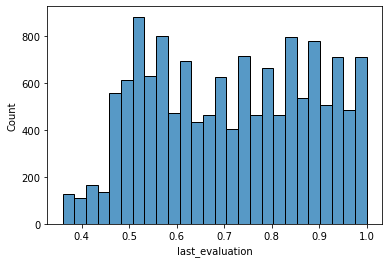

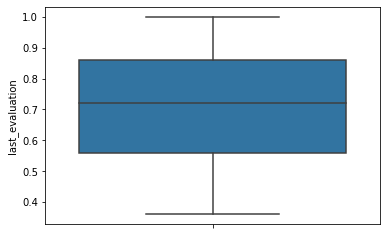

{'missing': 0,
 'min': 0.36,
 'max': 1.0,
 'mean': 0.72,
 'var': 0.03,
 'std': 0.17,
 'range': 0.64,
 'q1': 0.56,
 'q2': 0.72,
 'q3': 0.86,
 'skewness': -0.03,
 'kurtosis': -1.19}

In [30]:
univariate_num(data=data,x='last_evaluation')

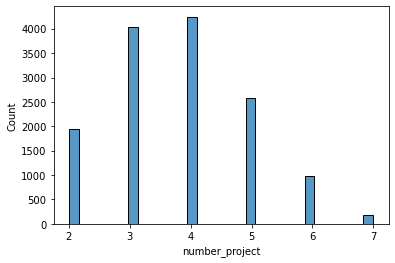

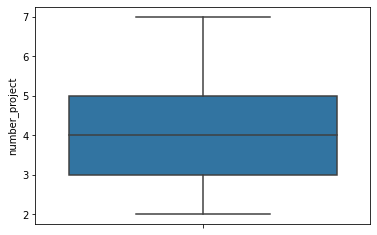

{'missing': 0,
 'min': 2,
 'max': 7,
 'mean': 3.8,
 'var': 1.39,
 'std': 1.18,
 'range': 5,
 'q1': 3.0,
 'q2': 4.0,
 'q3': 5.0,
 'skewness': 0.34,
 'kurtosis': -0.41}

In [31]:
univariate_num(data=data, x='number_project')

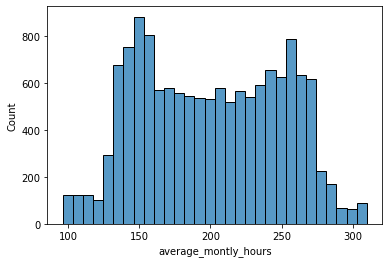

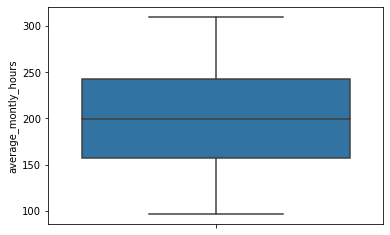

{'missing': 0,
 'min': 96,
 'max': 310,
 'mean': 200.51,
 'var': 2394.87,
 'std': 48.94,
 'range': 214,
 'q1': 157.0,
 'q2': 199.0,
 'q3': 243.0,
 'skewness': 0.04,
 'kurtosis': -1.1}

In [32]:
univariate_num(data=data, x='average_montly_hours')

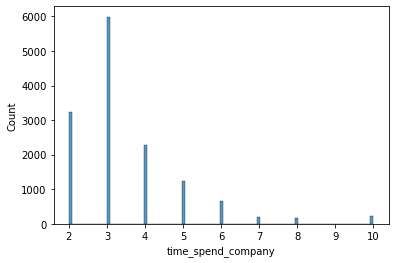

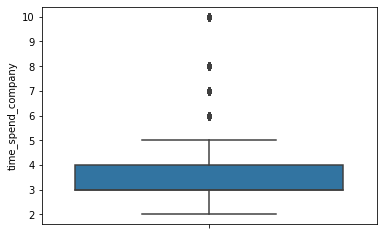

{'missing': 0,
 'min': 2,
 'max': 10,
 'mean': 3.47,
 'var': 2.21,
 'std': 1.49,
 'range': 8,
 'q1': 3.0,
 'q2': 3.0,
 'q3': 4.0,
 'skewness': 1.91,
 'kurtosis': 4.87}

In [33]:
univariate_num(data=data, x='time_spend_company')

Total missing values : 0

Total count of unique categories: 2

Unique categories :[0, 1]

value counts and %n     Count Percentage
0  11845     84.83%
1   2118     15.17%


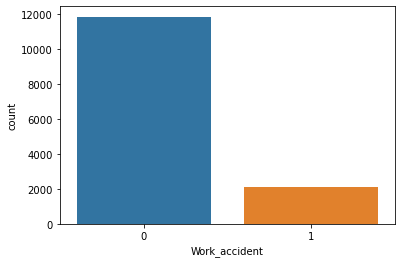

In [34]:
univariate_cat(data=data, x='Work_accident')

Total missing values : 0

Total count of unique categories: 2

Unique categories :[1, 0]

value counts and %n     Count Percentage
0  11428     81.84%
1   2535     18.16%


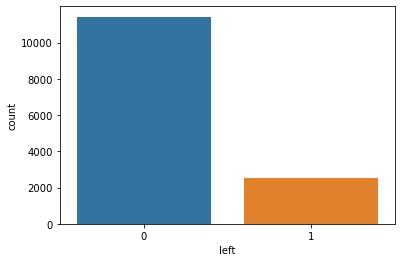

In [35]:
univariate_cat(data=data, x='left')

Total missing values : 0

Total count of unique categories: 2

Unique categories :[0, 1]

value counts and %n     Count Percentage
0  13651     97.77%
1    312      2.23%


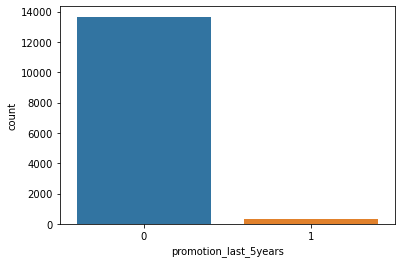

In [36]:
univariate_cat(data=data, x='promotion_last_5years')

### Missing Value Treatment

In [37]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [38]:
data1=pd.get_dummies(data)

In [39]:
data1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
satisfaction_level,13963.0,0.625517,0.242599,0.09,0.09,0.10,0.11,0.11,0.13,0.24,0.47,0.66,0.82,0.92,0.96,0.97,0.98,0.99,0.99,1.0
last_evaluation,13963.0,0.715845,0.169020,0.36,0.39,0.41,0.44,0.46,0.46,0.49,0.56,0.72,0.86,0.95,0.98,0.98,0.99,0.99,1.00,1.0
number_project,13963.0,3.798825,1.178701,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,4.00,5.00,5.00,6.00,6.00,6.00,6.00,7.00,7.0
average_montly_hours,13963.0,200.512426,48.937453,96.00,104.00,112.00,121.00,127.00,130.00,138.00,157.00,199.00,243.00,266.00,274.00,275.00,281.00,286.00,296.00,310.0
time_spend_company,13963.0,3.470100,1.486035,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,4.00,5.00,6.00,7.00,7.00,8.00,10.00,10.0
Work_accident,13963.0,0.151687,0.358730,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0
left,13963.0,0.181551,0.385488,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0
promotion_last_5years,13963.0,0.022345,0.147807,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.0
department_IT,13963.0,0.082289,0.274814,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.0
department_RandD,13963.0,0.054573,0.227153,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.0


In [40]:
### Outilers capping Function - Method -1
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [41]:
data2=data1.apply(outliers_percentile)

In [42]:
data2.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
satisfaction_level,13963.0,0.625438,0.242478,0.09,0.09,0.10,0.11,0.11,0.13,0.24,0.47,0.66,0.82,0.92,0.96,0.97,0.98,0.99,0.99,0.99
last_evaluation,13963.0,0.716007,0.168698,0.39,0.39,0.41,0.44,0.46,0.46,0.49,0.56,0.72,0.86,0.95,0.98,0.98,0.99,0.99,1.00,1.00
number_project,13963.0,3.798825,1.178701,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,4.00,5.00,5.00,6.00,6.00,6.00,6.00,7.00,7.00
average_montly_hours,13963.0,200.467808,48.694838,104.00,104.00,112.00,121.00,127.00,130.00,138.00,157.00,199.00,243.00,266.00,274.00,275.00,281.00,286.00,296.00,296.00
time_spend_company,13963.0,3.470100,1.486035,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,4.00,5.00,6.00,7.00,7.00,8.00,10.00,10.00
Work_accident,13963.0,0.151687,0.358730,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
left,13963.0,0.181551,0.385488,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,13963.0,0.022345,0.147807,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
department_IT,13963.0,0.082289,0.274814,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
department_RandD,13963.0,0.054573,0.227153,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00


In [43]:
data2.shape

(13963, 21)

### Multicolinearity

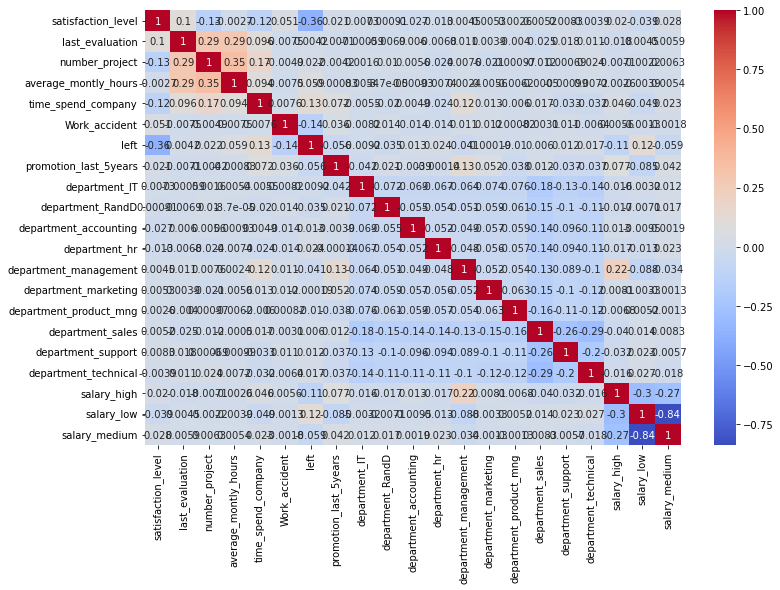

In [44]:
plt.figure(figsize=(12,8))
cr=data2.corr()
# cr=cr[abs(cr)>.7]
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

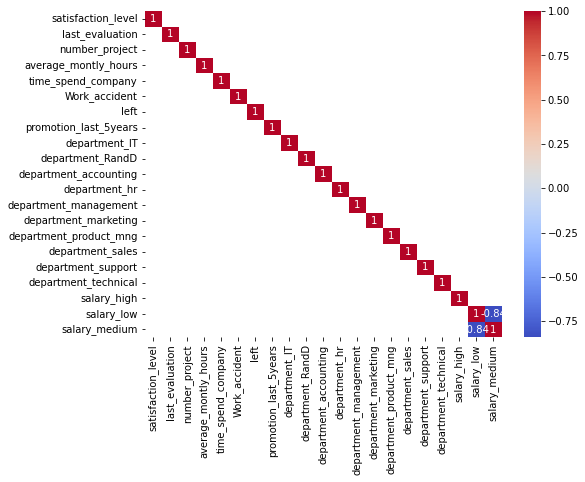

In [45]:
# here we cosider high multicollinearity only show
plt.figure(figsize=(8,6))
cr=data2.corr()
cr=cr[abs(cr)>.7]
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

### Model Development

In [46]:
x=data2.drop(columns=["left"])
y=data.left
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.2, random_state=99)

In [47]:
scaler=StandardScaler()
# scaling the train data
x_train1=scaler.fit_transform(x_train)
x_trains=pd.DataFrame(x_train1, columns=x_train.columns)

# Transforming the test data
x_test1=scaler.transform(x_test)
x_tests=pd.DataFrame(x_test1, columns=x_test.columns)

In [48]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")
def new_ratio(y):
    zero=len(y)-y.sum()# to find zero
    one=y.sum()
    rro=round(((one/len(y))*100),2)
    rrz=round(((zero/len(y))*100),2)
    print(f"Class ratio 1 ({one}) :0 ({zero}) is {rro}% : {rrz}%")


### Decision Tree

In [49]:
# Model with optimal hperparameters
dt_imb_model=DecisionTreeClassifier(criterion="gini",
                                   random_state=100,
                                   max_depth=10,
                                   min_samples_leaf=50,
                                   min_samples_split=100)
dt_imb_model.fit(x_trains, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [50]:
y_train_pred=dt_imb_model.predict(x_trains)
display_scores(y_train, y_train_pred)

F1 Score: 92.38%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      9148
           1       0.95      0.90      0.92      2022

    accuracy                           0.97     11170
   macro avg       0.97      0.94      0.95     11170
weighted avg       0.97      0.97      0.97     11170



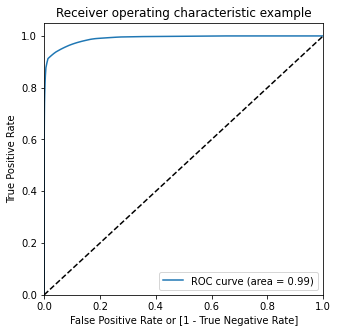

In [51]:
# Predicted Probability
y_train_pred_proba=dt_imb_model.predict_proba(x_trains)[:,1]
#  Plot the ROC Curve
draw_roc(y_train, y_train_pred_proba)

In [52]:
y_test_pred=dt_imb_model.predict(x_tests)
display_scores(y_test, y_test_pred)

F1 Score: 92.43%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2280
           1       0.95      0.90      0.92       513

    accuracy                           0.97      2793
   macro avg       0.96      0.95      0.95      2793
weighted avg       0.97      0.97      0.97      2793



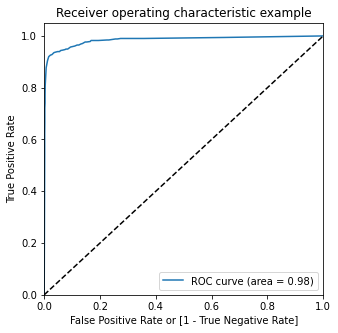

In [53]:
# Predicted Probability
y_test_pred_proba=dt_imb_model.predict_proba(x_tests)[:,1]
#  Plot the ROC Curve
draw_roc(y_test, y_test_pred_proba)

In [54]:
# helo(RandomOverSampler)

sampling_strategy=float(0-1)
- how much % of major class data , you want from minor class data

In [55]:
Origional
Major :200
minor :25
Over Sampled (strategy=.8)- 80% of major class
major :200
minor :160

SyntaxError: invalid syntax (3586683091.py, line 4)

In [56]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling stategy
oversample=RandomOverSampler(sampling_strategy=.8) # 

# fit and apply the transform
x_over, y_over=oversample.fit_resample(x_trains, y_train)

In [57]:
new_ratio(y_train)

Class ratio 1 (2022) :0 (9148) is 18.1% : 81.9%


In [58]:
new_ratio(y_over)

Class ratio 1 (7318) :0 (9148) is 44.44% : 55.56%


In [59]:
9148*.8

7318.400000000001

### Again we will Run Decision Tree on new_ratio

In [ ]:
# Model with optimal hperparameters
dt_over_model=DecisionTreeClassifier(criterion="gini",
                                   random_state=100,
                                   max_depth=10,
                                   min_samples_leaf=50,
                                   min_samples_split=100)
dt_over_model.fit(x_over, y_over)

In [ ]:
# predictions on the train set
y_train_pred=dt_over_model.predict(x_over)
display_scores(y_over, y_train_pred)

In [ ]:
# Predicted Probability
y_train_pred_proba=dt_over_model.predict_proba(x_over)[:,1]
#  Plot the ROC Curve
draw_roc(y_over, y_train_pred_proba)

### Test

### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# define oversampling stategy
# undersample=RandomUnderSampler(sampling_strategy={0:5000,1:2800})
# sampling_strategy : what % of major class you want if you specify float
undersample=RandomUnderSampler(sampling_strategy=.6)

# fit and apply the transform
x_under, y_under=undersample.fit_resample(x_trains, y_train)

In [ ]:
from collections import Counter
# Before sampling class distribution
print("Before sampling class distribution:-",Counter(y_train))
# new class dstribution
print("New class distribution:-",Counter(y_under))

In [ ]:
# Model with optimal hperparameters
dt_under_model=DecisionTreeClassifier(criterion="gini",
                                   random_state=100,
                                   max_depth=10,
                                   min_samples_leaf=50,
                                   min_samples_split=50)
dt_under_model.fit(x_under, y_under)

In [ ]:
# predictions on the train set
y_train_pred=dt_under_model.predict(x_under)
display_scores(y_under, y_train_pred)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#help(SMOTE)

In [60]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=0)
x_train_smote, y_train_smote=sm.fit_resample(x_trains, y_train)
# Artificial minority samples and corresponding minority labels from 
# SMOTE are appended

# below x_train and y_train

In [61]:
y_train_smote.value_counts()

0    9148
1    9148
Name: left, dtype: int64

In [62]:
y_train.value_counts()

0    9148
1    2022
Name: left, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
x_train_smote, y_train